In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statistics

In [4]:
data=pd.read_csv("C:\\Users\\91860\\Documents\\fitness_data.csv")
print(data.head())

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0         58.0   
4  34.0  Female         52.8        1.74     177    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [14]:
data.drop_duplicates(inplace=True)
data.isnull().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          28
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
Calories_per_workout             81
Workout_Efficiency               80
dtype: int64

In [15]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [5]:
data['Calories_per_workout'] = data['Calories_Burned'] / (data['Workout_Frequency (days/week)'] + 1)
data['Workout_Efficiency'] = data['Session_Duration (hours)'] / (data['Workout_Frequency (days/week)'] + 1)
print(data[['Calories_per_workout', 'Workout_Efficiency']])

      Calories_per_workout  Workout_Efficiency
0               118.666667            0.186667
1               138.833333            0.166667
2               419.500000            0.310000
3               125.600000            0.290000
4               257.200000            0.320000
...                    ...                 ...
1795            347.000000            0.277500
1796            341.750000            0.192500
1797            315.250000            0.300000
1798            191.200000            0.208000
1799            235.600000            0.258000

[1800 rows x 2 columns]


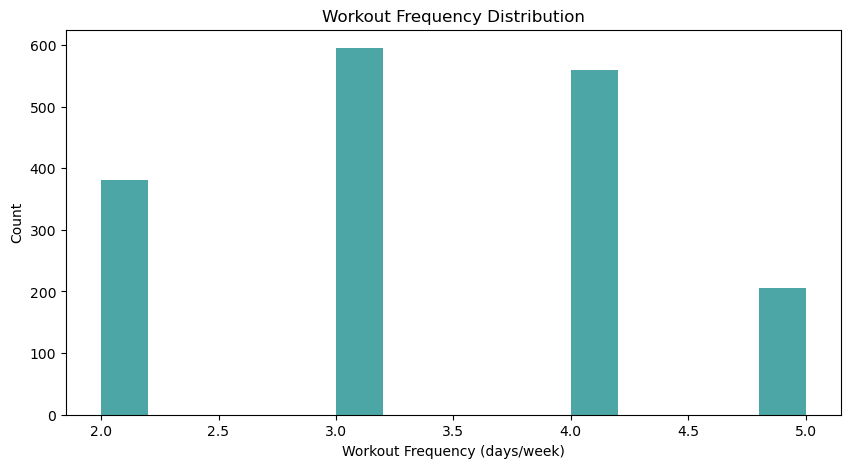

In [6]:
plt.figure(figsize=(10,5))
plt.hist(data['Workout_Frequency (days/week)'], bins=15, color='teal', alpha=0.7)
plt.title('Workout Frequency Distribution')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Count')
plt.show()

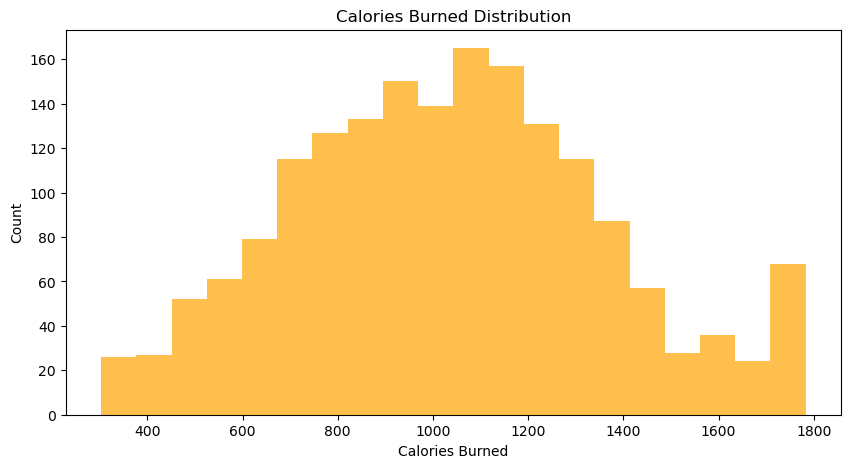

In [7]:
plt.figure(figsize=(10,5))
plt.hist(data['Calories_Burned'], bins=20, color='orange', alpha=0.7)
plt.title('Calories Burned Distribution')
plt.xlabel('Calories Burned')
plt.ylabel('Count')
plt.show()

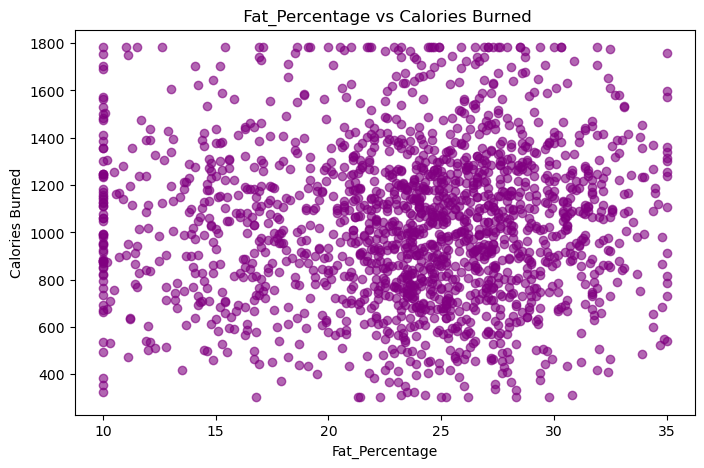

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(data['Fat_Percentage'], data['Calories_Burned'], alpha=0.6, color='purple')
plt.title(' Fat_Percentage vs Calories Burned')
plt.xlabel('Fat_Percentage')
plt.ylabel('Calories Burned')
plt.show()

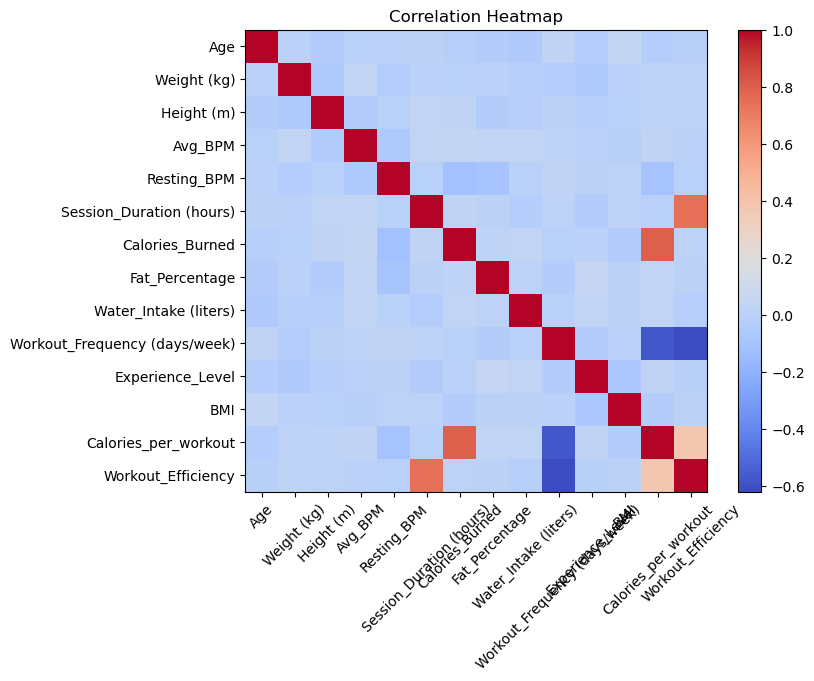

In [9]:
plt.figure(figsize=(8,6))
corr = data.corr(numeric_only=True)
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

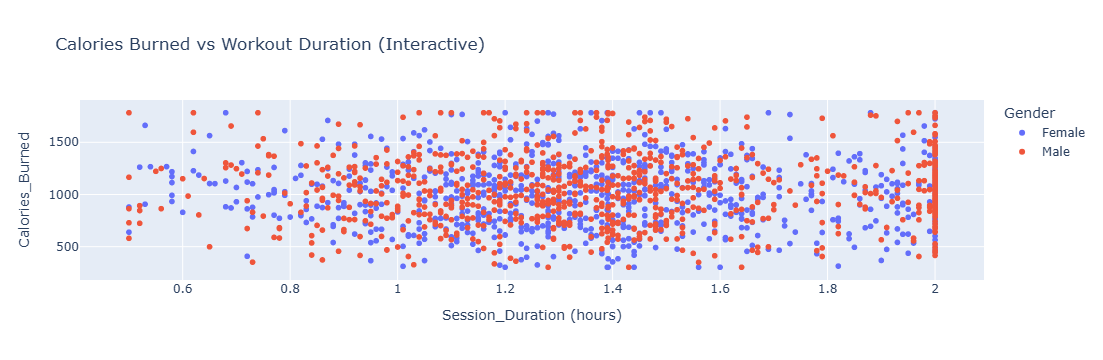

In [17]:
fig = px.scatter(
    data, 
    x='Session_Duration (hours)', 
    y='Calories_Burned',
    color='Gender',
    title='Calories Burned vs Workout Duration (Interactive)',
    hover_data=['Workout_Type', 'Experience_Level']
)
fig.show()

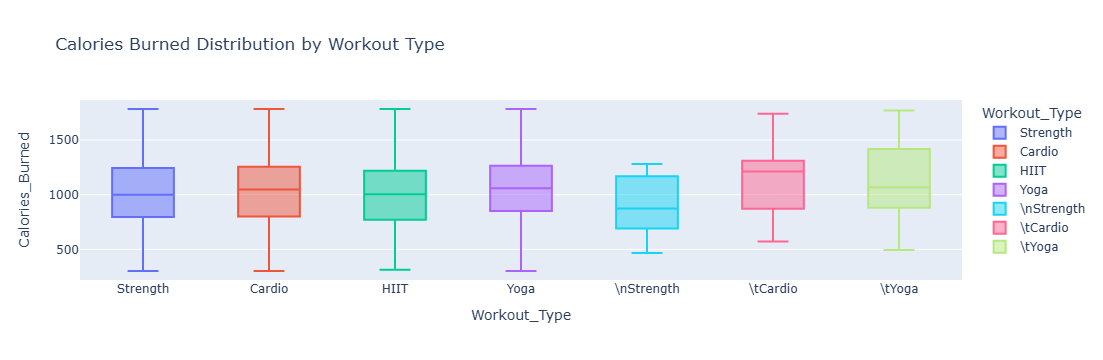

In [18]:
fig = px.box(data, x='Workout_Type', y='Calories_Burned', color='Workout_Type',
             title="Calories Burned Distribution by Workout Type")
fig.show()

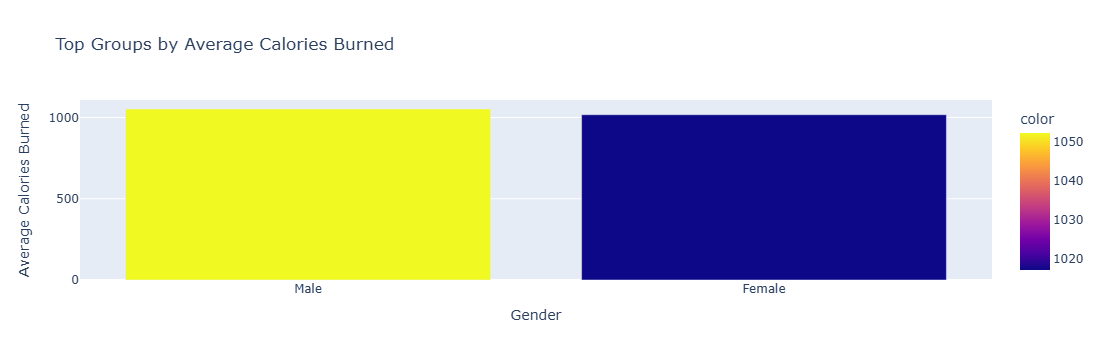

In [19]:
top_groups = data.groupby('Gender')['Calories_Burned'].mean().nlargest(5)
fig = px.bar(
    top_groups,
    x=top_groups.index,
    y=top_groups.values,
    title='Top Groups by Average Calories Burned',
    color=top_groups.values,
    labels={'x': 'Gender', 'y': 'Average Calories Burned'}
)
fig.show()


In [13]:
# Convert Max_BPM to numeric safely
data['Max_BPM'] = pd.to_numeric(data['Max_BPM'], errors='coerce')

print("Average Weight (kg):", round(data['Weight (kg)'].mean(), 2))
print("Average Calories Burned:", round(data['Calories_Burned'].mean(), 2))
print("Highest Heart Rate Recorded:", int(data['Max_BPM'].max()))
print("Most Active Age Group:", data.groupby('Age')['Session_Duration (hours)'].sum().idxmax())


Average Weight (kg): 67.61
Average Calories Burned: 1033.7
Highest Heart Rate Recorded: 199
Most Active Age Group: 18.0
